In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # 过滤读取文件时的错误
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


# ccl数据可视化
-- 导入数据

In [3]:
ccl=pd.read_csv('ccl.txt',header=None,sep='|') 
ccl.head() # 查看数据导入情况

,0,1,2,3,4,5,6
0,C00713602,2019,2020,C00712851,O,U,228963
1,H0AK00105,2020,2020,C00607515,H,P,229250
2,H0AL01055,2020,2020,C00697789,H,P,226125
3,H0AL01063,2020,2020,C00701557,H,P,227053
4,H0AL01071,2020,2020,C00701409,H,P,227054


* 数据已经被成功导入，但是数据没有列名
* 添加列名

In [4]:
columns=['CAND_ID','CAND_ELECTION_YR','FEC_ELECTION_YR','CMTE_ID','CMTE_TP','CMTE_DSGN','LINKAGE_ID']
ccl.columns=columns
ccl.head()

,CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
0,C00713602,2019,2020,C00712851,O,U,228963
1,H0AK00105,2020,2020,C00607515,H,P,229250
2,H0AL01055,2020,2020,C00697789,H,P,226125
3,H0AL01063,2020,2020,C00701557,H,P,227053
4,H0AL01071,2020,2020,C00701409,H,P,227054


## 理解数据含义
-- 数据字段介绍：
* CAND_ID:候选人ID
* CAND_ELECTION_YR:候选人选举年份
* FEC_ELECTION_YR:联邦选举委员会选举年份
* CMTE_ID:委员会ID
* CMTE_TP:委员会类型
* CMTE_DSGN:委员会名称
* LINKAGE_ID:链接标识号

注：具体的数值含义暂不作了解，目前只做可视化部分

## 观察数据

In [5]:
ccl.shape #查看数据行列数

(6843, 7)

In [6]:
ccl.size #查看数据大小，包括NaN

47901

In [7]:
ccl.dtypes #查看个字段的数据类型，是否符合预想

CAND_ID             object
CAND_ELECTION_YR     int64
FEC_ELECTION_YR      int64
CMTE_ID             object
CMTE_TP             object
CMTE_DSGN           object
LINKAGE_ID           int64
dtype: object

-- 可以看出，有一些字段的格式不正确
* 修改LINKAGE_ID字段为object格式

In [18]:
ccl['LINKAGE_ID']=ccl['LINKAGE_ID'].astype('object')
ccl.dtypes

CAND_ID             object
CAND_ELECTION_YR     int64
FEC_ELECTION_YR      int64
CMTE_ID             object
CMTE_TP             object
CMTE_DSGN           object
LINKAGE_ID          object
dtype: object

In [20]:
ccl.info() # 查看数据的整体情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6843 entries, 0 to 6842
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CAND_ID           6843 non-null   object
 1   CAND_ELECTION_YR  6843 non-null   int64 
 2   FEC_ELECTION_YR   6843 non-null   int64 
 3   CMTE_ID           6843 non-null   object
 4   CMTE_TP           6843 non-null   object
 5   CMTE_DSGN         6843 non-null   object
 6   LINKAGE_ID        6843 non-null   object
dtypes: int64(2), object(5)
memory usage: 374.4+ KB


-- 可以看出，数据中没有缺失值

## 查看定性变量的统计信息

In [21]:
str_variables= ccl.columns[ ccl.dtypes == 'object'] 
ccl[str_variables].describe()

,CAND_ID,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
count,6843,6843,6843,6843,6843
unique,6161,6608,10,6,6843
top,P60022118,C00493783,H,P,229375
freq,11,16,4613,6068,1


-- 可以看出，候选人ID（CAND_ID）列是存在重复值的
* 查看CAND_ID列的重复值信息

In [25]:
ccl[ccl.duplicated(subset=['CAND_ID'], keep=False)]

,CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
11,H0AL02087,1970,1970,C00462143,H,P,222607
12,H0AL02087,1970,1970,C00493783,H,J,222650
28,H0AR01083,1970,1970,C00493783,H,J,222649
29,H0AR01083,1970,1970,C00462374,H,P,222608
35,H0AR03055,1970,1970,C00497149,N,J,222804
...,...,...,...,...,...,...,...
6836,S8WV00143,1970,1970,C00674770,S,J,225413
6837,S8WV00143,1970,1970,C00651075,S,P,225377
6838,S8WV00143,1970,1970,C00689471,S,J,225486
6839,S8WV00143,1970,1970,C00710889,N,U,228546


-- 可以明确，CAND_ID存在重复是情有可原的
* 进一步查看是否存在重复数据（所有观测全部重复）

In [26]:
ccl[ccl.duplicated(keep=False)]

,CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID


-- 数据中不存在重复数据

# 对数据进行可视化
注：只为了练习可视化方法，所以一些可视化图形可能是没有意义的
* CAND_ID的频数条形图

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


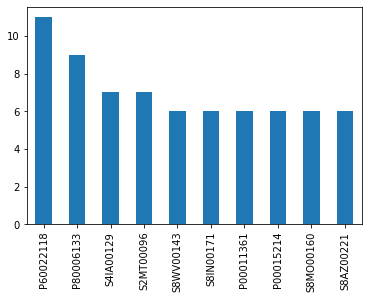

In [29]:
ccl['CAND_ID'].value_counts()[:10].plot(kind='bar') # 绘制CAND_ID的频数排名前10的条形图

In [53]:
df1=ccl['CAND_ID'].value_counts()[:10]
df1.index

Index(['P60022118', 'P80006133', 'S4IA00129', 'S2MT00096', 'S8WV00143',
       'S8IN00171', 'P00011361', 'P00015214', 'S8MO00160', 'S8AZ00221'],
      dtype='object')

* 绘制[CAND_ID,CMTE_ID,CMTE_TP，CMTE_DSGN]一起展示的频数条形图

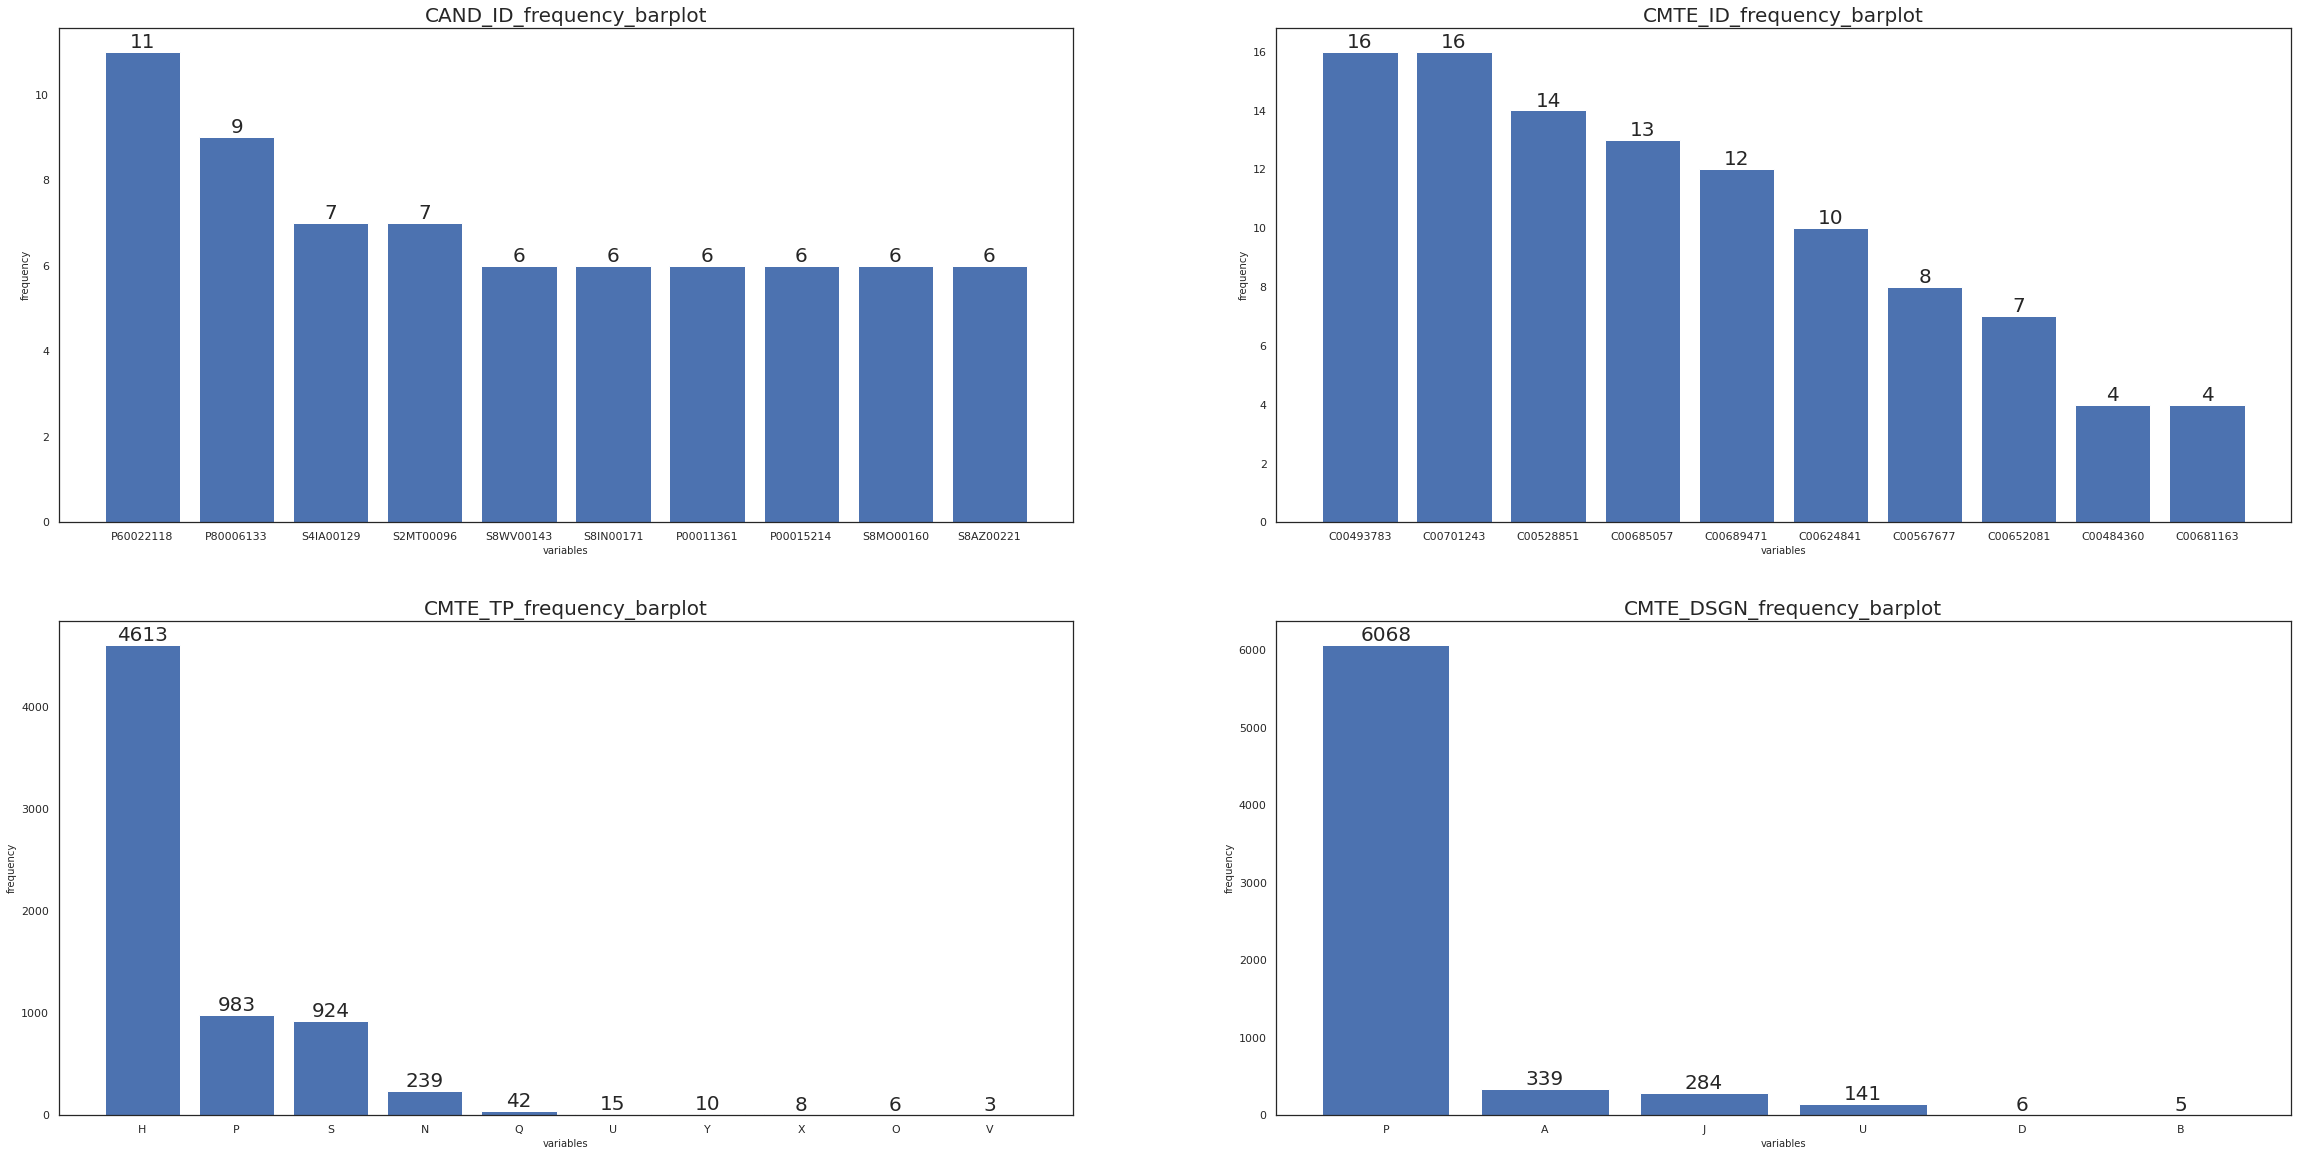

In [77]:
plot_columns=['CAND_ID','CMTE_ID','CMTE_TP', 'CMTE_DSGN']
sns.set(style="white")   # 设置一个主题

plt.figure(figsize=(40,20)) # 设置图形大小
for col in plot_columns:
    df=ccl[col].value_counts()[:10] # 取频数前5的值
    pos=plot_columns.index(col)+1
    plt.subplot(2,2,pos)
    plt.bar(df.index,df.values)
    plt.xlabel('variables', fontsize=10)
    plt.ylabel('frequency', fontsize=10)
    plt.title(f'{col}_frequency_barplot', fontsize=20) #显示标题
    for a, b in zip(df.index, df.values):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=20)